# Climate Starter

## Import Dependencies 

In [230]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [231]:
import numpy as np
import pandas as pd

## Reflect Tables into SQLAlchemy ORM

In [232]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [233]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [234]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [235]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

## Save references to each table

In [236]:
Measurement = Base.classes.measurement
Station = Base.classes.station

## Create our session (link) from Python to the DB

In [237]:
session = Session(engine)

In [238]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

## Review Measurement Table

In [239]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

## Use Pandas to query Measurement Database 

In [240]:
measurement_data = pd.read_sql("SELECT * FROM measurement", engine)
measurement_data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


## Review Station Table

In [241]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

## Use Pandas to query Station Database

In [242]:
station_data = pd.read_sql("SELECT * FROM station", engine)
station_data.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


# Exploratory Climate Analysis

### Design a query to retrieve the last 12 months of precipitation data and plot the results


In [243]:
import datetime as dt

### Run query for start and end of the year

In [244]:
# Run query to find out end of the year on Measurement Table
end_year = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(f'The last record date of the measurement table is {end_year}.')

#Calculate the beginning of the year
start_year = dt.date(2017,8,23) - dt.timedelta(days=365)
print(f'The Start Date of precipitation plot is  {start_year}.')

The last record date of the measurement table is 2017-08-23.
The Start Date of precipitation plot is  2016-08-23.


### Retrieve the last 12 months of precipitation

In [245]:
# run session query to filter by prcp by the year 
session.query(Measurement.prcp).filter(Measurement.date > '2011-03-01').order_by(Measurement.date).all()

[(0.0),
 (0.0),
 (0.0),
 (None),
 (0.0),
 (0.01),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.12),
 (0.2),
 (0.89),
 (0.06),
 (0.69),
 (0.03),
 (0.0),
 (0.88),
 (1.05),
 (1.45),
 (1.42),
 (1.7),
 (1.25),
 (0.6),
 (0.94),
 (0.4),
 (0.13),
 (0.26),
 (0.22),
 (0.26),
 (0.29),
 (0.03),
 (1.16),
 (0.64),
 (0.27),
 (1.51),
 (0.0),
 (0.24),
 (0.01),
 (0.0),
 (None),
 (None),
 (0.03),
 (0.01),
 (0.03),
 (0.29),
 (None),
 (0.03),
 (0.03),
 (None),
 (0.11),
 (0.01),
 (0.39),
 (0.0),
 (1.11),
 (0.2),
 (0.09),
 (0.16),
 (None),
 (0.66),
 (0.9),
 (0.01),
 (0.01),
 (1.5),
 (0.15),
 (1.33),
 (1.4),
 (None),
 (0.36),
 (0.27),
 (2.39),
 (0.1),
 (0.82),
 (0.07),
 (0.02),
 (0.2),
 (0.34),
 (0.04),
 (0.47),
 (0.0),
 (0.14),
 (0.01),
 (0.01),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.01),
 (0.01),
 (0.0),
 (0.0),
 (0.0),
 (None),
 (None),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (None),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.01),
 (0.0),
 (None),
 (0.0),
 (0.0),
 (0.0),
 (0.0),
 (0.01),
 (0.01),
 (0

In [246]:
date_prcp = pd.read_sql("select date, prcp from measurement \
                        where date >= '2016-08-23';", engine)
set_index_prcp = date_prcp.set_index('date')

In [247]:
#Calculate AVG prcp a month
date_prcp_mean = date_prcp.groupby(["date"]).mean()
date_prcp_mean

,prcp
date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
2016-08-29,0.243333
2016-08-30,0.011667
2016-08-31,0.636000


### Sort the dataframe by date

In [248]:
sorted_prcp_dates= date_prcp.sort_values(by=['date'])
s_prcp_dates = sorted_prcp_dates.set_index("date")

### Plot Precipitation results into a bar chart

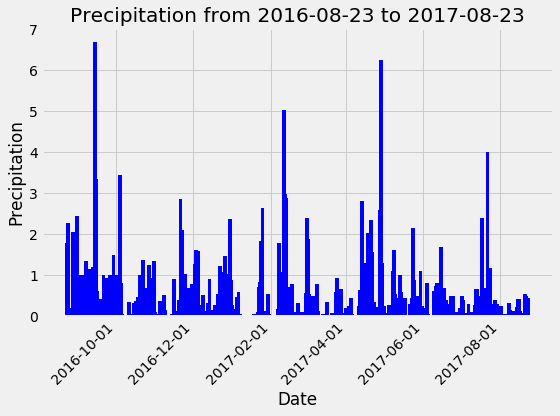

<Figure size 432x288 with 0 Axes>

In [280]:
import matplotlib.dates as mdates

#plot data
plt.figure(figsize=(8,6))
plt.bar(pd.to_datetime(s_prcp_dates.index), s_prcp_dates["prcp"], color="blue",  width=3)

# Format x-tick label
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha="right")

# Adding Legend
plt.title('Precipitation from 2016-08-23 to 2017-08-23')
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.tight_layout()
plt.show()
plt.savefig('prcp_date.png', bbox_inches="tight")

## Use Pandas to calcualte the summary statistics for the precipitation data

In [250]:
date_prcp.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Design a query to show how many stations are available in this dataset?


In [251]:
## Use Pandas to query Station Table
station_data = pd.read_sql("SELECT * FROM station", engine)
station_data.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [252]:
## Number of available stations
session.query(Station).count()

9

### Most active stations (i.e. what stations have the most rows)/ List the stations and the counts in descending order.

In [253]:
active_stations = session.query(Measurement.station,  
                  func.count(Measurement.tobs)).\
                  group_by(Measurement.station).\
                  order_by(func.count(Measurement.tobs).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [254]:
print(f'The most active stations is {active_stations[0][0]}')

The most active stations is USC00519281


## Using the station id from the previous query, calculate the lowest temperature recorded.

In [255]:
stations_temp = session.query(Measurement.station,
                func.min(Measurement.tobs),
                func.max(Measurement.tobs), 
                func.avg(Measurement.tobs)).\
                filter(Measurement.station == active_stations[0][0]).all()

print(stations_temp)

[('USC00519281', 54.0, 85.0, 71.66378066378067)]


### Choose the station with the highest number of temperature observations.
### Query the last 12 months of temperature observation data for this station and plot the results as a histogram

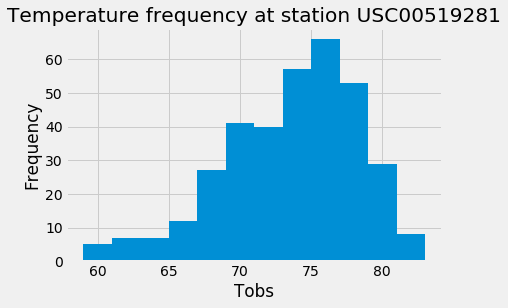

In [268]:
# Query temp in active station
act_sta_tob = session.query(Measurement.tobs). \
    filter(Measurement.date >= start_year). \
    filter(Measurement.station == active_stations[0][0]).all()

# Temp List 
tobs = [t[0] for t in act_sta_tob]

# Plot
plt.hist(tobs, bins=12, label="temperature")
plt.xlabel("Tobs")
plt.ylabel("Frequency")
plt.title(f"Temperature frequency at station {active_stations[0][0]}")
plt.gca().set_axisbelow(True)
plt.show
plt.savefig('active_station_temp.png',bbox_inches="tight")

## Temperature Calculation Function 
#### Arguments:

##### start_date (str): trip start date in the format %Y-%m-%d
##### end_date (str): trip end date in the format %Y-%m-%d

#### Results :
#####    Temp_Min, Temp_AVG, TMAX

In [257]:
#Temperature Function Calculation
def calc_temps(st_date, end_date):
    st_date_dt = dt.datetime.strptime(st_date, '%Y-%m-%d')
    end_date_dt = dt.datetime.strptime(end_date, '%Y-%m-%d')

    trip_dates = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    temps = session.query(*trip_dates).\
                filter(Measurement.date>=st_date).\
                filter(Measurement.date<=end_date).all()[0]
    
    return temps

In [260]:
# Trip Information
st_date = "2012-02-28"
end_date = "2012-03-05"
[temp_min, temp_avg, temp_max] = calc_temps(st_date, end_date)

print(f"Trip Start Date {st_date} and Trip End Date is {end_date}")
print(f"Min Temperature is {temp_min}")
print(f"Average Temperature is {temp_avg}") 
print(f"Max Temperature is {temp_max}")

Trip Start Date 2012-02-28 and Trip End Date is 2012-03-05
Min Temperature is 62.0
Average Temperature is 69.57142857142857
Max Temperature is 74.0


# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

In [267]:
st_date = "2011-02-28"
end_date = "2011-03-05"
[temp_min, temp_avg, temp_max] = calc_temps(st_date, end_date)

print(f"Start Date {st_date} and End Date is {end_date}")
print(f"Min Temperature is {temp_min}")
print(f"Average Temperature is {temp_avg}") 
print(f"Max Temperature is {temp_max}")

Start Date 2011-02-28 and End Date is 2011-03-05
Min Temperature is 61.0
Average Temperature is 69.75510204081633
Max Temperature is 75.0


## Plot the results from your previous query as a bar chart. 

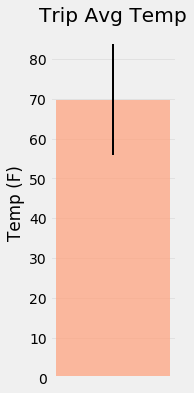

In [279]:
#Plot data
plt.figure(figsize=(2,6))
plt.bar(0, temp_avg, color="lightsalmon", width=1.4, 
        alpha=0.7, yerr=temp_max-temp_min, error_kw={"linewidth":2})

#Axis Format 
plt.grid(linestyle='-', linewidth='0.5', color='lightgrey')
plt.gca().set_axisbelow(True)
plt.gca().set_xticks([])

# Adding Legend
plt.ylabel("Temp (F)")
plt.title("Trip Avg Temp")
plt.savefig('temp_avg.png', bbox_inches="tight", dpi = 300)